# EBTEL with `PPP_C` Losses
Some EBTEL runs with the following parameters, using both the RK losses (see Klimchuk et al.,2008) and the `PPP_C` losses. The latter is plotted below for reference.

In [5]:
import sys
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_context('notebook',font_scale=1.5)
sns.set_style(style='darkgrid')

sys.path.append('/home/wtb2/Documents/ebtelPlusPlus/rsp_toolkit/python/')
import xml_io
sys.path.append('/home/wtb2/Documents/hercules/hercules/')
from quick_look import QuickViewer

%matplotlib inline

Eech EBTEL simulation is heated by a triangular profile of duration 100 s with a heating rate adjusted such that the peak temperature is ~10 MK. Each simulation uses a flux limiter of 1 (consistent with HYDRAD's treatment of flux limiting) and an adaptive solver.

Each simulation is run for a total of 10,000 s to allow all of the loops to cool below 1 MK. The background heating of each EBTEL simulation is adjusted such that it does not influience the time needed for the loop to cool below 1 MK. The footpoint density of each HYDRAD simulation is adjusted such that the initial densities for the HYDRAD and EBTEL runs are roughly the same.

| Case # | Loop Length (Mm) | $H_0$ (ergs cm$^{-3}$ s$^{-1}$) | $H_{bg}$ (ergs cm$^{-3}$ s$^{-1}$), EBTEL | $n(s=0,t=0)$ (cm$^{-3}$), HYDRAD |
|:------:|:------:|:------:|:-----------:|:-----------:|
| 1 | $20$ | $0.335$ | $3.5\times10^{-5}$ | $1.1\times10^{10}$ |
| 2 | $40$| $0.0838$ | $1.23\times10^{-5}$ | $1.05\times10^{10}$ | 
| 3 | $80$ | $0.0209$ | $4.38\times10^{-6}$ | $1.02\times10^{10}$|
| 4 | $100$| $0.0134$ | $3.13\times10^{-6}$ | $1\times10^{10}$ |

## Loss Functions: `PPP_C` Losses versus RK Losses

Plot the two loss functions. The `PPP_C` loss function data is copied out of a piece of old Fortran code and was calculated by Robert Lionello in 2015. 

In [6]:
temperature_ppp_c = np.array([
    1.00E+03, 1.26E+03, 1.58E+03, 2.00E+03, 2.51E+03,
    3.16E+03, 3.98E+03, 5.01E+03, 6.31E+03, 7.94E+03,
    1.00E+04, 1.26E+04, 1.58E+04, 2.00E+04, 2.51E+04,
    3.16E+04, 3.98E+04, 5.01E+04, 6.31E+04, 7.94E+04,
    1.00E+05, 1.26E+05, 1.58E+05, 2.00E+05, 2.51E+05,
    3.16E+05, 3.98E+05, 5.01E+05, 6.31E+05, 7.94E+05,
    1.00E+06, 1.26E+06, 1.58E+06, 2.00E+06, 2.51E+06,
    3.16E+06, 3.98E+06, 5.01E+06, 6.31E+06, 7.94E+06,
    1.00E+07, 1.26E+07, 1.58E+07, 2.00E+07, 2.51E+07,
    3.16E+07, 3.98E+07, 5.01E+07, 6.31E+07, 7.94E+07,
    1.00E+08
])
radlosses_ppp_c = np.array([
    0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0,
    1.00e-23,
    1.49e-23,  2.21e-23,  3.34e-23,  4.96e-23,  7.41e-23,
    1.11e-22,  1.65e-22,  2.47e-22,  3.69e-22,  5.51e-22,
    5.15e-22,  5.57e-22,  6.02e-22,  5.96e-22,  4.17e-22,
    3.12e-22,  3.41e-22,  3.71e-22,  4.02e-22,  4.32e-22,
    4.20e-22,  3.83e-22,  2.80e-22,  1.55e-22,  9.60e-23,
    7.81e-23,  7.88e-23,  8.60e-23,  9.23e-23,  8.94e-23,
    7.16e-23,  4.86e-23,  3.46e-23,  2.88e-23,  2.67e-23,
    2.66e-23,  2.75e-23,  2.90e-23,  3.09e-23,  3.30e-23,
])

In [7]:
def rk_loss_function(temperature_e):
    chi = np.array([1.0909e-31, 8.8669e-17, 1.8957e-22, 3.5300e-13, 3.4629e-25, 5.4883e-16, 1.96e-27])
    alpha = np.array([2.0,-1.0,0.0,-1.5,1.0/3.0,-1.0,0.5])
    temperature_bins = np.array([1.0, 9.3325e+4, 4.67735e+5, 1.51356e+6, 3.54813e+6, 7.94328e+6, 4.28048e+7, 1e+300])

    rad_loss = None

    for i in range(len(chi)):
        if temperature_bins[i] < temperature_e <= temperature_bins[i+1]:
            rad_loss = chi[i]*temperature_e**(alpha[i])
            break

    return rad_loss

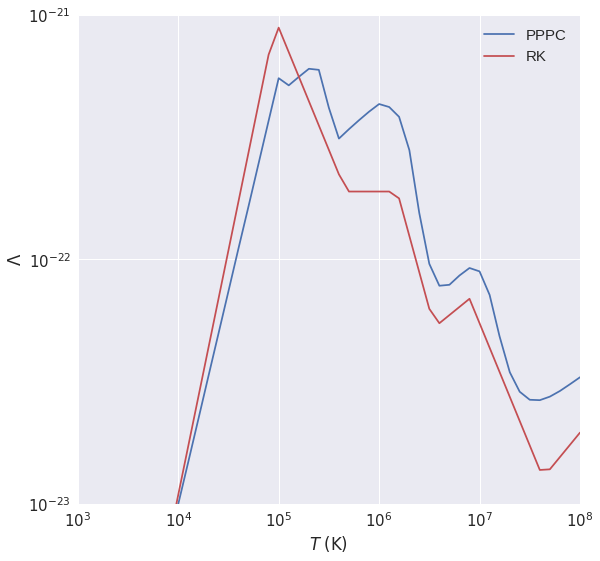

In [8]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca()
ax.plot(temperature_ppp_c,radlosses_ppp_c,
        linestyle='-',color=sns.color_palette('deep')[0],label=r'PPPC')
ax.plot(temperature_ppp_c,np.array(list(map(rk_loss_function,temperature_ppp_c))),
        linestyle='-',color=sns.color_palette('deep')[2],label=r'RK')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e3,1e8])
ax.set_ylim([1e-23,1e-21])
ax.set_ylabel(r'$\Lambda$')
ax.set_xlabel(r'$T$ $(\mathrm{K})$')
ax.legend(loc='best')

## Load HYDRAD Results

In [13]:
loop_lengths = [20.0,40.0,80.0,100.0]

In [14]:
hydrad_results = {'rk_losses':{},'ppp_c_losses':{}}

In [15]:
chromosphere_depth=5e8

In [90]:
(1-10/(90))*0.9

0.7999999999999999

In [16]:
for loop_length in loop_lengths:
    print('Loading HYDRAD results for L={} Mm, RK losses'.format(loop_length))
    qv = QuickViewer('/data/datadrive1/HYDRAD_runs/ebtel_nrl_compare/rk_losses/L{}Mm/Results'.format(int(loop_length)))
    qv.load_results()
    qv.make_timeseries(lower_percent=0.9*(1.0 - 2.*chromosphere_depth/(2.*chromosphere_depth+2.*loop_length*1e8)),
                       upper_percent=0.9*(1.0 - 2.*chromosphere_depth/(2.*chromosphere_depth+2.*loop_length*1e8)))
    hydrad_results['rk_losses']['L{}Mm'.format(loop_length)] = {'t':qv.time,
                                                                'T':qv.timeseries['Te'],
                                                                'n':qv.timeseries['ne']}
    print('Loading HYDRAD results for L={} Mm,PPP-C losses'.format(loop_length))
    qv = QuickViewer('/data/datadrive1/HYDRAD_runs/ebtel_nrl_compare/pppc_losses/L{}Mm/Results'.format(int(loop_length)))
    qv.load_results()
    qv.make_timeseries(lower_percent=0.9*(1.0 - 2.*chromosphere_depth/(2.*chromosphere_depth+2.*loop_length*1e8)),
                       upper_percent=0.9*(1.0 - 2.*chromosphere_depth/(2.*chromosphere_depth+2.*loop_length*1e8)))
    hydrad_results['ppp_c_losses']['L{}Mm'.format(loop_length)] = {'t':qv.time,
                                                                   'T':qv.timeseries['Te'],
                                                                   'n':qv.timeseries['ne']}

Loading HYDRAD results for L=20.0 Mm, RK losses
Loading HYDRAD results for L=20.0 Mm,PPP-C losses
Loading HYDRAD results for L=40.0 Mm, RK losses
Loading HYDRAD results for L=40.0 Mm,PPP-C losses
Loading HYDRAD results for L=80.0 Mm, RK losses
Loading HYDRAD results for L=80.0 Mm,PPP-C losses
Loading HYDRAD results for L=100.0 Mm, RK losses
Loading HYDRAD results for L=100.0 Mm,PPP-C losses


## EBTEL Runs

Do the EBTEL runs described above.

In [58]:
ebtel_results = {'rk_losses':{},'ppp_c_losses':{}}

In [73]:
ih = xml_io.InputHandler('/home/wtb2/Documents/ebtelPlusPlus/config/ebtel.example.cfg.xml')
base_dir = ih.lookup_vars()
base_dir['force_single_fluid'] = True
base_dir['heating']['events'] = [{'event':{'rise_start':0.0,'rise_end':50.0,
                                           'decay_start':50.0,'decay_end':100.0,
                                           'magnitude':None}}]
base_dir['heating']['partition'] = 0.5
base_dir['adaptive_solver_error'] = 1e-12
base_dir['use_adaptive_solver'] = True
base_dir['use_flux_limiting'] = True
base_dir['saturation_limit'] = 1.0
base_dir['c1_cond0'] = 6.0
base_dir['total_time'] = 10000.0
base_dir['tau'] = 0.1

In [74]:
def estimate_heating_rate(L):
    c1 = 1.83e3
    c2 = 5.09e4
    tmax=1.25e7
    return c2/(c1**3.5)*(tmax)**3.5/(L**2)

In [103]:
for loop_length in loop_lengths:
    base_dir['heating']['background'] = ((loop_length/20.0)**(-1.5))*5.e-5
    base_dir['heating']['events'][0]['event']['magnitude'] = estimate_heating_rate(loop_length*1e8)
    base_dir['loop_length'] = loop_length*1e8
    base_dir['output_filename'] = 'tmp'
    #RK Losses
    base_dir['use_power_law_radiative_losses'] = True
    oh = xml_io.OutputHandler(base_dir['output_filename']+'.xml',base_dir)
    oh.print_to_xml()
    #oh.display_xml()
    subprocess.call(['/home/wtb2/Documents/ebtelPlusPlus/bin/ebtel++.run',
                     '-c',base_dir['output_filename']+'.xml',
                     '-r','/home/wtb2/Documents/ebtelPlusPlus/config/radiation.local.cfg.xml'])
    tmp = np.loadtxt(base_dir['output_filename'])
    ebtel_results['rk_losses']['L{}Mm'.format(loop_length)] = {'t':tmp[:,0],'T':tmp[:,1],'n':tmp[:,3]}
    #print some useful info
    print("{}".format(''.join(50*['*'])))
    print('background heating is {}'.format(base_dir['heating']['background']))
    print('heating rate is {}'.format(base_dir['heating']['events'][0]['event']['magnitude']))
    print('n(t=0) = {:g}'.format(tmp[:,3][0]))
    #ppp_c losses
    base_dir['use_power_law_radiative_losses'] = False
    oh = xml_io.OutputHandler(base_dir['output_filename']+'.xml',base_dir)
    oh.print_to_xml()
    subprocess.call(['/home/wtb2/Documents/ebtelPlusPlus/bin/ebtel++.run',
                     '-c',base_dir['output_filename']+'.xml',
                     '-r','/home/wtb2/Documents/ebtelPlusPlus/config/radiation.local.cfg.xml'])
    tmp = np.loadtxt(base_dir['output_filename'])
    ebtel_results['ppp_c_losses']['L{}Mm'.format(loop_length)] = {'t':tmp[:,0],'T':tmp[:,1],'n':tmp[:,3]}


**************************************************
background heating is 5e-05
heating rate is 0.3351691380249025
n(t=0) = 2.45107e+08
**************************************************
background heating is 1.767766952966369e-05
heating rate is 0.08379228450622563
n(t=0) = 1.34411e+08
**************************************************
background heating is 6.25e-06
heating rate is 0.020948071126556406
n(t=0) = 6.70574e+07
**************************************************
background heating is 4.47213595499958e-06
heating rate is 0.013406765520996101
n(t=0) = 5.19251e+07


## Plots

Plot the $T$ and $n$ curves and calculate the cooling time between 1 MK and 3 MK. The associated cooling times for each loss function are printed on each $T$ plot and shown in the corresponding color. The differences and ratios between the cases are also shown. The black dotted reference lines show 3 MK and 1 MK.

### Temperature

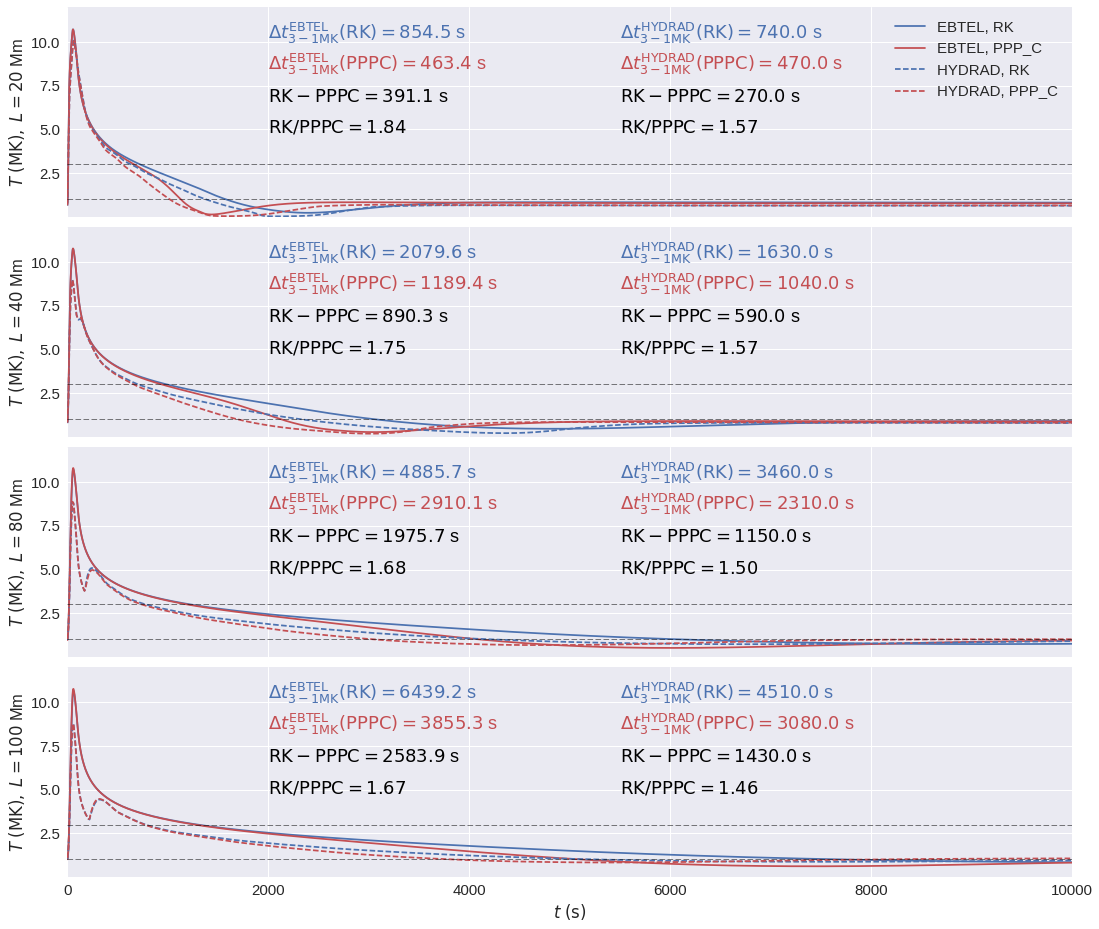

In [111]:
fig,axes = plt.subplots(4,1,figsize=(18,16),sharex=True)
plt.subplots_adjust(hspace=0.05)
text_on=True
for i,l in enumerate(loop_lengths):
    #cooling times--EBTEL
    trk = ebtel_results['rk_losses']['L{}Mm'.format(l)]['t']
    Trk = ebtel_results['rk_losses']['L{}Mm'.format(l)]['T']
    irk_gmax = np.argmax(Trk)
    trk_gmax = trk[irk_gmax:]
    Trk_gmax = Trk[irk_gmax:]
    i_3MK_rk = np.where(Trk_gmax<3e6)[0][0]
    i_1MK_rk = np.where(Trk_gmax<1e6)[0][0]
    delta_trk_ebtel = trk_gmax[i_1MK_rk] - trk_gmax[i_3MK_rk] 
    tpppc = ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['t']
    Tpppc = ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['T']
    ipppc_gmax = np.argmax(Tpppc)
    tpppc_gmax = tpppc[ipppc_gmax:]
    Tpppc_gmax = Tpppc[ipppc_gmax:]
    i_3MK_pppc = np.where(Tpppc_gmax<3e6)[0][0]
    i_1MK_pppc = np.where(Tpppc_gmax<1e6)[0][0]
    delta_tpppc_ebtel = tpppc_gmax[i_1MK_pppc] - tpppc_gmax[i_3MK_pppc]
    
    #cooling times--HYDRAD
    trk = hydrad_results['rk_losses']['L{}Mm'.format(l)]['t']
    Trk = hydrad_results['rk_losses']['L{}Mm'.format(l)]['T']
    irk_gmax = np.argmax(Trk)
    trk_gmax = trk[irk_gmax:]
    Trk_gmax = Trk[irk_gmax:]
    i_3MK_rk = np.where(Trk_gmax<3e6)[0][0]
    i_1MK_rk = np.where(Trk_gmax<1e6)[0][0]
    delta_trk_hydrad = trk_gmax[i_1MK_rk] - trk_gmax[i_3MK_rk] 
    tpppc = hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['t']
    Tpppc = hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['T']
    ipppc_gmax = np.argmax(Tpppc)
    tpppc_gmax = tpppc[ipppc_gmax:]
    Tpppc_gmax = Tpppc[ipppc_gmax:]
    i_3MK_pppc = np.where(Tpppc_gmax<3e6)[0][0]
    i_1MK_pppc = np.where(Tpppc_gmax<1e6)[0][0]
    delta_tpppc_hydrad = tpppc_gmax[i_1MK_pppc] - tpppc_gmax[i_3MK_pppc]
    
    #EBTEL
    #temperature
    axes[i].plot(ebtel_results['rk_losses']['L{}Mm'.format(l)]['t'],
                  ebtel_results['rk_losses']['L{}Mm'.format(l)]['T']/1.0e6,
                  color=sns.color_palette('deep')[0],label=r'EBTEL, RK')
    axes[i].plot(ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['t'],
                  ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['T']/1.0e6,
                  color=sns.color_palette('deep')[2],label=r'EBTEL, PPP_C')
    #HYDRAD
    axes[i].plot(hydrad_results['rk_losses']['L{}Mm'.format(l)]['t'],
              hydrad_results['rk_losses']['L{}Mm'.format(l)]['T']/1.0e6,
              color=sns.color_palette('deep')[0],linestyle='--',
                label=r'HYDRAD, RK')
    axes[i].plot(hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['t'],
              hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['T']/1.0e6,
              color=sns.color_palette('deep')[2],linestyle='--',
                label=r'HYDRAD, PPP_C')
    if text_on:
        #print cooling times--EBTEL
        axes[i].text(0.2,0.85,
                     r'$\Delta t_{{3-1\mathrm{{MK}}}}^{{\mathrm{{EBTEL}}}}(\mathrm{{RK}})={:.1f}$ s'.format(delta_trk_ebtel),
                       color=sns.color_palette('deep')[0],fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.2,0.7,
                     r'$\Delta t_{{3-1\mathrm{{MK}}}}^{{\mathrm{{EBTEL}}}}(\mathrm{{PPPC}})={:.1f}$ s'.format(delta_tpppc_ebtel),
                       color=sns.color_palette('deep')[2],fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.2,0.55,
                     r'$\mathrm{{RK}}-\mathrm{{PPPC}}={:.1f}$ s'.format(delta_trk_ebtel-delta_tpppc_ebtel),
                       color='k',fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.2,0.4,
                     r'$\mathrm{{RK}}/\mathrm{{PPPC}}={:.2f}$'.format(delta_trk_ebtel/delta_tpppc_ebtel),
                       color='k',fontsize=18,transform=axes[i].transAxes)
        #print cooling times--HYDRAD
        axes[i].text(0.55,0.85,
                     r'$\Delta t_{{3-1\mathrm{{MK}}}}^{{\mathrm{{HYDRAD}}}}(\mathrm{{RK}})={:.1f}$ s'.format(delta_trk_hydrad),
                       color=sns.color_palette('deep')[0],fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.55,0.7,
                     r'$\Delta t_{{3-1\mathrm{{MK}}}}^{{\mathrm{{HYDRAD}}}}(\mathrm{{PPPC}})={:.1f}$ s'.format(delta_tpppc_hydrad),
                       color=sns.color_palette('deep')[2],fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.55,0.55,
                     r'$\mathrm{{RK}}-\mathrm{{PPPC}}={:.1f}$ s'.format(delta_trk_hydrad-delta_tpppc_hydrad),
                       color='k',fontsize=18,transform=axes[i].transAxes)
        axes[i].text(0.55,0.4,
                     r'$\mathrm{{RK}}/\mathrm{{PPPC}}={:.2f}$'.format(delta_trk_hydrad/delta_tpppc_hydrad),
                       color='k',fontsize=18,transform=axes[i].transAxes)

    #reference lines
    axes[i].axhline(y=1,color='k',linestyle='--',alpha=0.5,linewidth=1)
    axes[i].axhline(y=3,color='k',linestyle='--',alpha=0.5,linewidth=1)
    #limits and labels
    axes[i].set_ylim([0.01,12])
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=5,prune='lower'))
    axes[i].set_xlim([0,base_dir['total_time']])
    axes[i].set_ylabel(r'$T$ $(\mathrm{{MK}}),$ $L={:.0f}$ Mm'.format(l))
    if i==len(loop_lengths)-1:
        axes[i].set_xlabel(r'$t$ $(\mathrm{s})$')
    if i==0:
        axes[i].legend(loc='upper right',)
plt.savefig('modified_losses_temperature.pdf',bbox_inches='tight')

### Density

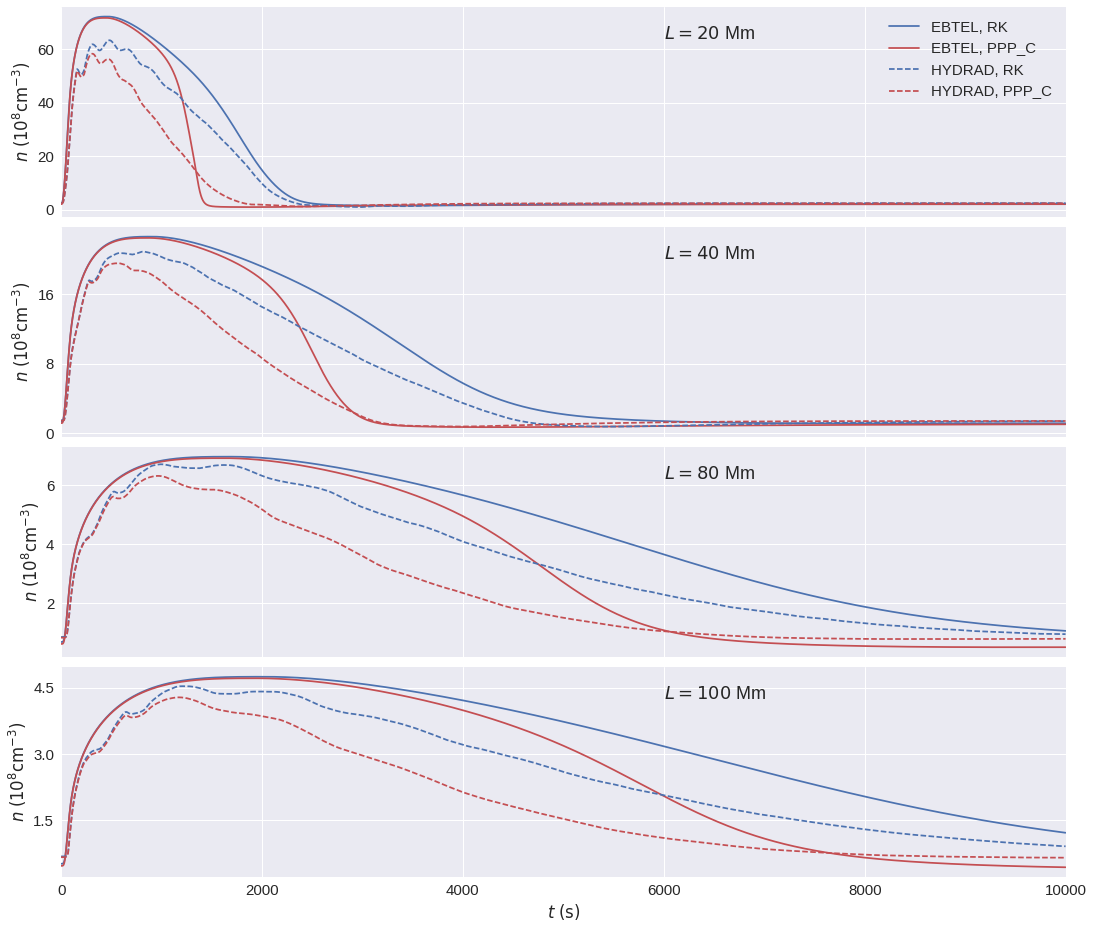

In [108]:
fig,axes = plt.subplots(4,1,figsize=(18,16),sharex=True)
plt.subplots_adjust(hspace=0.05)
for i,l in enumerate(loop_lengths):
    #density--EBTEL
    axes[i].plot(ebtel_results['rk_losses']['L{}Mm'.format(l)]['t'],
                  ebtel_results['rk_losses']['L{}Mm'.format(l)]['n']/1.0e8,
                  color=sns.color_palette('deep')[0],label=r'EBTEL, RK')
    axes[i].plot(ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['t'],
                  ebtel_results['ppp_c_losses']['L{}Mm'.format(l)]['n']/1.0e8,
                  color=sns.color_palette('deep')[2],label=r'EBTEL, PPP_C')
    #density--HYDRAD
    axes[i].plot(hydrad_results['rk_losses']['L{}Mm'.format(l)]['t'],
              hydrad_results['rk_losses']['L{}Mm'.format(l)]['n']/1.0e8,
              color=sns.color_palette('deep')[0],linestyle='--',label=r'HYDRAD, RK')
    axes[i].plot(hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['t'],
              hydrad_results['ppp_c_losses']['L{}Mm'.format(l)]['n']/1.0e8,
              color=sns.color_palette('deep')[2],linestyle='--',label=r'HYDRAD, PPP_C')
    #text
    axes[i].text(0.6,0.85,r'$L={:.0f}$ Mm'.format(l),transform=axes[i].transAxes,fontsize=18)
    #labels and limits
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=4,prune='lower'))
    axes[i].set_xlim([1,base_dir['total_time']])
    axes[i].set_ylabel(r'$n$ $(10^8\mathrm{cm}^{-3})$')
    if i==len(loop_lengths)-1:
        axes[i].set_xlabel(r'$t$ $(\mathrm{s})$')
    if i==0:
        axes[i].legend(loc='best')
    #axes[i].set_xscale('log')
    #axes[i].set_ylim([0.1,5])
plt.savefig('modified_losses_density.pdf',bbox_inches='tight')

### HYDRAD Resolution Tests

In [200]:
qv_tmp_40 = QuickViewer('/data/datadrive1/HYDRAD_runs/ebtel_nrl_compare/rk_losses/L40Mm/Results/')

In [201]:
qv_tmp_40.load_results()

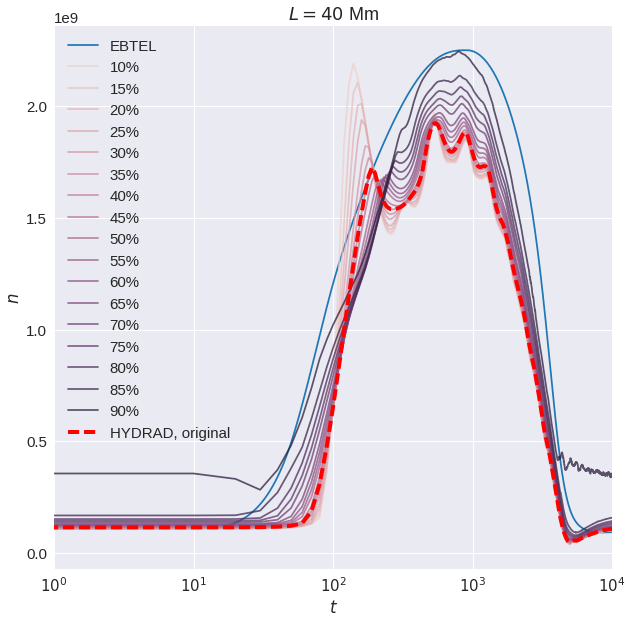

In [211]:
plt.figure(figsize=(10,10))
plt.plot(ebtel_results['rk_losses']['L40.0Mm']['t'],ebtel_results['rk_losses']['L40.0Mm']['n'],label=r'EBTEL')
percentages = np.arange(0.1,0.95,0.05) 
for i,p in enumerate(percentages):
    qv_tmp_40.make_timeseries(lower_percent=p,upper_percent=p)
    plt.plot(qv_tmp_40.time,qv_tmp_40.timeseries['ne'],label=r'{:.0f}%'.format(p*100),
            color=sns.cubehelix_palette(len(percentages))[i],alpha=0.75)
plt.plot(hydrad_results['rk_losses']['L40.0Mm']['t'],hydrad_results['rk_losses']['L40.0Mm']['n'],
        label=r'HYDRAD, original',color='r',linestyle='--',lw=4)
plt.xlim([1,1e4])
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$n$')
plt.xlabel(r'$t$')
plt.title(r'$L=40$ Mm')

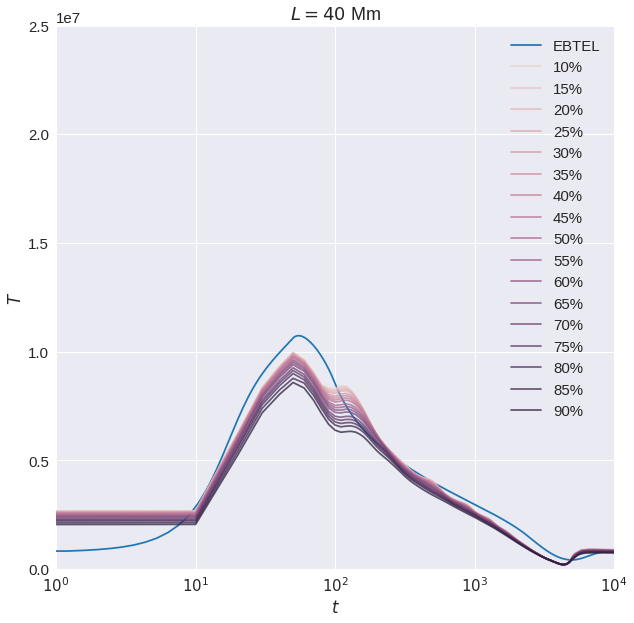

In [232]:
plt.figure(figsize=(10,10))
plt.plot(ebtel_results['rk_losses']['L40.0Mm']['t'],ebtel_results['rk_losses']['L40.0Mm']['T'],label=r'EBTEL')
percentages = np.arange(0.1,0.95,0.05) 
for i,p in enumerate(percentages):
    qv_tmp_40.make_timeseries(lower_percent=p,upper_percent=p)
    plt.plot(qv_tmp_40.time,qv_tmp_40.timeseries['Te'],label=r'{:.0f}%'.format(p*100),
            color=sns.cubehelix_palette(len(percentages))[i],alpha=0.75)
plt.xlim([1,1e4])
plt.ylim([0,25e6])
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$T$')
plt.xlabel(r'$t$')
plt.title(r'$L=40$ Mm')

In [204]:
qv_tmp_100 = QuickViewer('/data/datadrive1/HYDRAD_runs/ebtel_nrl_compare/rk_losses/L100Mm/Results/')
qv_tmp_100.load_results()

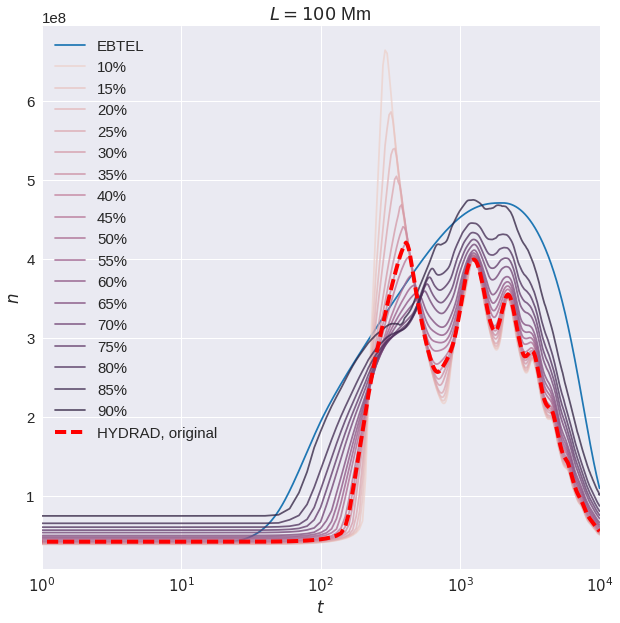

In [210]:
plt.figure(figsize=(10,10))
plt.plot(ebtel_results['rk_losses']['L100.0Mm']['t'],ebtel_results['rk_losses']['L100.0Mm']['n'],label=r'EBTEL')
percentages = np.arange(0.1,0.95,0.05) 
for i,p in enumerate(percentages):
    qv_tmp_100.make_timeseries(lower_percent=p,upper_percent=p)
    plt.plot(qv_tmp_100.time,qv_tmp_100.timeseries['ne'],label=r'{:.0f}%'.format(p*100),
            color=sns.cubehelix_palette(len(percentages))[i],alpha=0.75)
plt.plot(hydrad_results['rk_losses']['L100.0Mm']['t'],hydrad_results['rk_losses']['L100.0Mm']['n'],
        label=r'HYDRAD, original',color='r',linestyle='--',lw=4)
plt.xlim([1,1e4])
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$n$')
plt.xlabel(r'$t$')
plt.title(r'$L=100$ Mm')

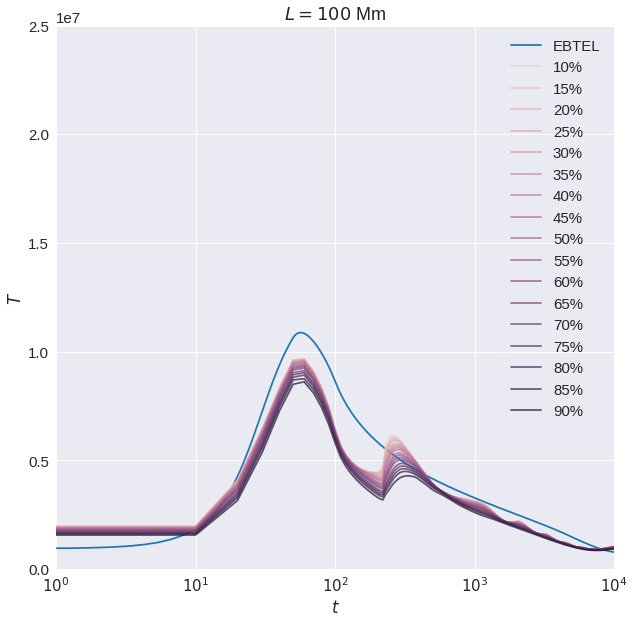

In [233]:
plt.figure(figsize=(10,10))
plt.plot(ebtel_results['rk_losses']['L100.0Mm']['t'],ebtel_results['rk_losses']['L100.0Mm']['T'],label=r'EBTEL')
percentages = np.arange(0.1,0.95,0.05) 
for i,p in enumerate(percentages):
    qv_tmp_100.make_timeseries(lower_percent=p,upper_percent=p)
    plt.plot(qv_tmp_40.time,qv_tmp_100.timeseries['Te'],label=r'{:.0f}%'.format(p*100),
            color=sns.cubehelix_palette(len(percentages))[i],alpha=0.75)
plt.xlim([1,1e4])
plt.ylim([0,25e6])
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$T$')
plt.xlabel(r'$t$')
plt.title(r'$L=100$ Mm')